# Linear Regression Project

Ecommerce company is trying to decide whether to focus their efforts on their mobile app experience or their website. 
Let's figure it out! 

In [1]:
# Data and Setup.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [7]:
# Exploring data.

In [8]:
# Jointplots - Time on Website to Yearly Amount Spent and Time on App to Yearly Amount Spent.

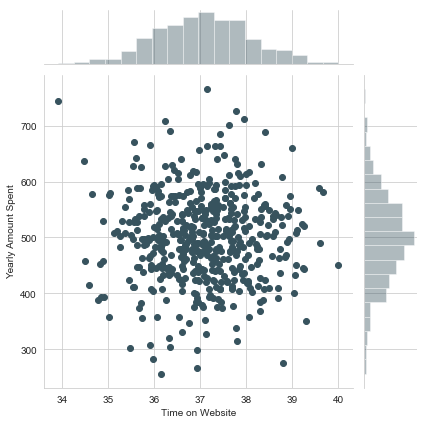

In [10]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=customers)

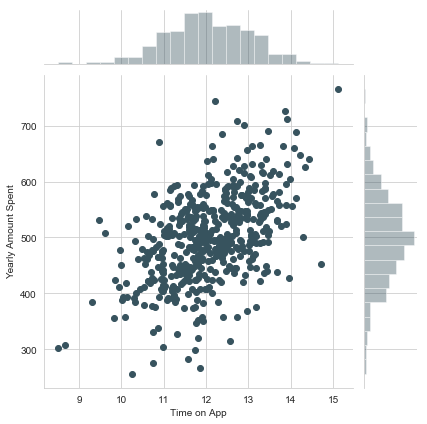

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=customers)

More time on site, more money spent.

In [12]:
# Hex jointplot - Time on App and Length of Membership.

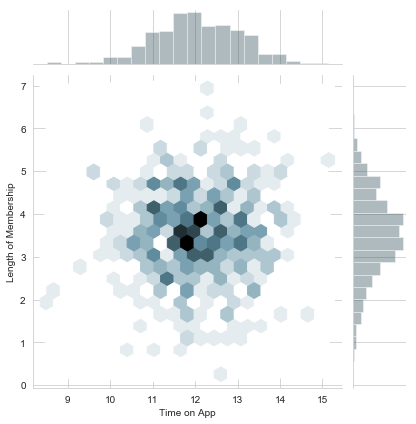

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

In [14]:
# Exploring these types of relationships across the entire data set.

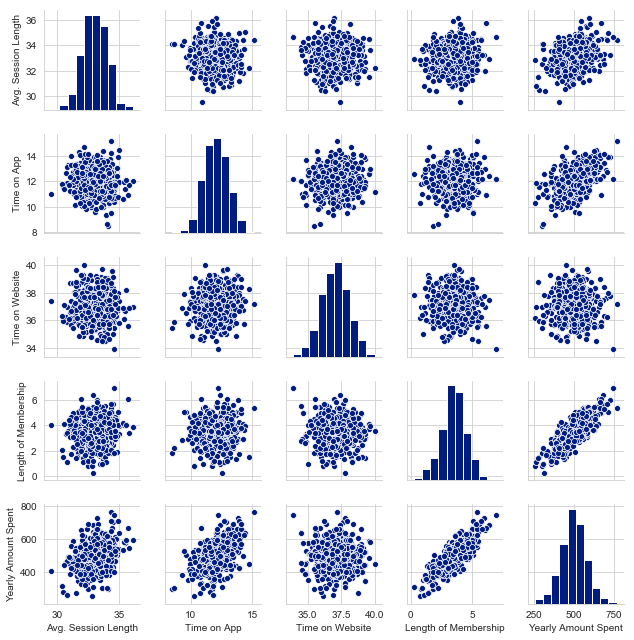

In [15]:
sns.set_palette('dark')
sns.pairplot(customers, height=1.8)

Length of Membership is the most correlated feature with Yearly Amount Spent.

In [16]:
# Linear model plot - Yearly Amount Spent vs. Length of Membership.

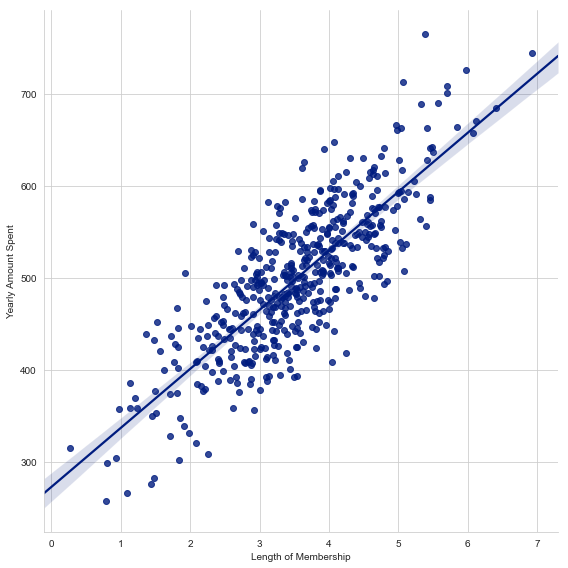

In [17]:

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers, height=8, palette='deep')

In [18]:
# Training and Testing Data.

In [19]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
y = customers['Yearly Amount Spent']

In [21]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# Training the Model.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# What are the coefficients of the model?

In [29]:
print('Coefficients: ', lm.coef_)

Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


In [30]:
# Predicting Test Data.

In [31]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

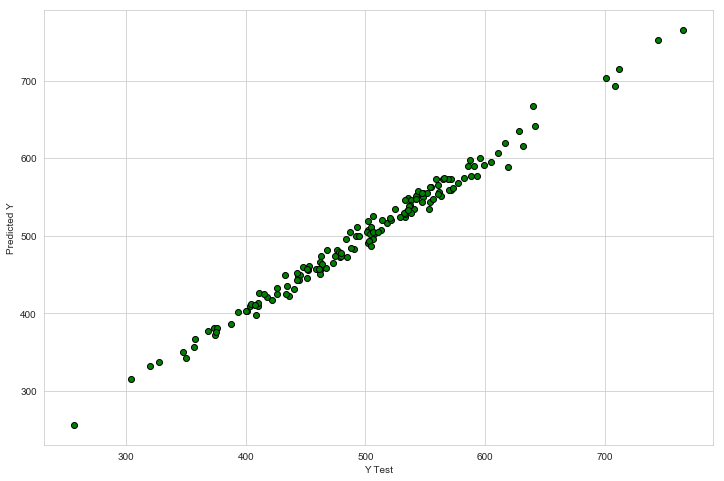

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test,predictions,edgecolors='black',c='g')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [33]:
# Evaluating the Model.

In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.228148653430853
Mean Squared Error: 79.81305165097487
Root Mean Squared Error: 8.933815066978656


In [35]:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, predictions))

Explained Variance Score: 0.9890771231889606


In [36]:
 # Residuals

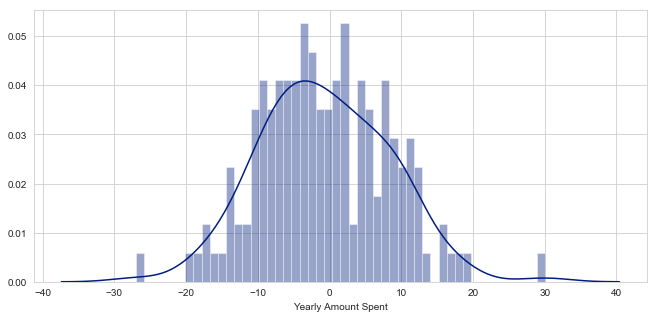

In [38]:
plt.figure(figsize=(11, 5))
sns.distplot((y_test-predictions),bins=50);

In [39]:
# Conclusion

In [40]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of £25.98 total spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of £38.59 total spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of £0.19 total spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of £61.27 total spent.

In [41]:
# Does company should focus more on their mobile app or website development?

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. 

In [42]:
#The End